In [82]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math 
from collections import Counter


In [83]:
data = pd.read_csv("data/survey_results_public.csv")
data_schema= pd.read_csv("data/survey_results_schema.csv")


data.shape


(88883, 85)

In [84]:
pd.set_option('display.max_columns', 5)
pd.set_option('display.max_rows', None)

                                                           მონაცემთა დამუშავება 

                                                ზრდა-კლების მიხედვით დალაგების ფუნქცია 

In [85]:
def sort_dict_by_value(Dictionary, reverse = False):        # ალაგებს ზრდის-კლების მიხედვით 
    return dict(sorted(Dictionary.items(), key = lambda x: x[1], reverse = reverse)) 

                                                         გრაფიკის აგების ფუნქცია    

In [86]:

def Build_Barh_sizes( key_Phrases , Quantity , interviewed_Numbers ,style , x_axis_visible, sizes, title ):
    
    fig, ax = plt.subplots(figsize=(sizes))


    langs = key_Phrases

    langs_users_num = np.array(Quantity)

    total = len(interviewed_Numbers)

    percent = langs_users_num/total*100


    new_labels = [i+'  {:.1f}%'.format(j) for i, j in zip(langs, percent)]   # პროცენტობის სიზუსტე


    plt.barh(langs, langs_users_num)  # თვითონ ნახაზი
    plt.yticks(range(len(langs)), new_labels) # პროცენტობის გამოსახვა და ღერძების განლაგება



    for spine in ax.spines.values():    # ვერდიკალური ხაზების მოშორება
        spine.set_visible(False)

    ax.axes.get_xaxis().set_visible(x_axis_visible)  # იქს ღეძზე მნიშვნელობების დასმა მოშორება 
    ax.tick_params(axis="y", left=False)
    
    plt.style.use(style)   # ნახაზის სტილი 

    plt.title(title)  # add title
    # reset the plot configurations to default
    #plt.rcdefaults()
    
    # update the overall font size
    #plt.rcParams.update({'font.size':6})

    # change the fontsize of the xtick and ytick labels
    plt.rc('xtick', labelsize=16)
    plt.rc('ytick', labelsize=16)

    # change the fontsize of axes title
    #plt.rc('axes', titlesize=20)
    
    plt.show()

                                                        სიების სორტირების ფუქნცია

In [87]:
def list_sorter_counter(filtered_list):
  
  global key_Phrases    # გამოვაცხადე გლობალურ ცვლადებად რათა სხვა ფუნქციებში გამოვიყენო
  global Quantity       # გამოვაცხადე გლობალურ ცვლადებად რათა სხვა ფუნქციებში გამოვიყენო


  union = []                          # ერთი დიდი სია 

  for i in filtered_list:
      for k in i :                    # ერთ დიდი სიაში აერთიანებს ყველაფერს 
          union.append(k)

  Counted = Counter(union)             # დიდ სიაში ითვლის რაში რა რამდენჯერ მეორდება



  Counted = sort_dict_by_value(Counted, False)  #იყენებს ძემოთა ფუქნციას


  key_Phrases = []  #ინახავს ფრაზებს
  Quantity = []   # ინახავს რაოდენობას 

  

  items = Counted.items()    # ფაქტიურად დიქშინარის გარდაქმნის ლისთად


  for item in items:        # ანაწილებს ფრაზებს და რაოდენობებს სათანადო სიებში
      key_Phrases.append(item[0])   # უშვებს ფრაზებს
      Quantity.append(item[1])      # უშვებს რიცხვით მნიშვნელობებს


In [154]:
def year_5_to_50(sorted_list):
    global Phrases_5_to_50
    global quantity_5_to_50

    ########## ვქმნით სხვადასხვა ასაკის შესანახად ცარიელ ლისთებს #################
    less_than_5 = []
    from_5_to_9 = []
    from_10_to_14 = []
    from_15_to_19 = []
    from_20_to_24 = []
    from_25_to_29 = []
    from_30_to_34 = []
    from_35_to_39 = []
    from_40_to_44 = []
    from_45_to_49 = []
    more_than_50 =[]

    ########## ვანაცვლებთ ერთ წელზე ნაკლებს და 50 წელზე მეტს 1-ით და 50-ით ########
    sorted_list = np.array(sorted_list)
    sorted_list = np.where(sorted_list == 'Less than 1 year', "1", sorted_list)
    sorted_list = np.where(sorted_list == 'More than 50 years', "50", sorted_list)

    
    ######## ვანაწილებთ სხვადასხვა ასაკს თავის შესაბამის ლისტში ######
    for i in sorted_list:
        if i in str(list(range(0,5))):
            less_than_5.append(i)
        elif i in str(list(range(5,10))):
            from_5_to_9.append(i)
        elif i in str(list(range(10,15))):
            from_10_to_14.append(i)
        elif i in str(list(range(15,20))):
            from_15_to_19.append(i)
        elif i in str(list(range(20,25))):
            from_20_to_24.append(i)
        elif i in str(list(range(25,30))):
            from_25_to_29.append(i)
        elif i in str(list(range(30,35))):
            from_30_to_34.append(i)
        elif i in str(list(range(35,40))):
            from_35_to_39 .append(i)
        elif i in str(list(range(40,45))):
            from_40_to_44.append(i)
        elif i in str(list(range(45,50))):
            from_45_to_49.append(i)
        elif i in str(list(range(50,100))):
            more_than_50.append(i)
            

    ######### ვანაწილებთ რაოდენობებს და შესაბამის შუალედებს 2 სხვადასხვა ლისტში #############
    Phrases_5_to_50= ["less than 5", "5 to 9", "10 to 14", "15 to 19", "20 to 24", "25 to 29", "30 to 34", "35 to 39", "40 to 44", "45 to 49", "50 or more"]
    quantity_5_to_50 = [len(less_than_5), len(from_5_to_9), len(from_10_to_14), len(from_15_to_19), len(from_20_to_24), len(from_25_to_29), len(from_30_to_34), len(from_35_to_39), len(from_40_to_44), len(from_45_to_49), len(more_than_50)]

    Phrases_5_to_50.reverse()      ###### ეს რაღაცა ჯანდაბა ატრიალებს გრაფიკს, ამუ თავში რაც იყო ზევით მიდის და პირიქით #######
    quantity_5_to_50.reverse()

   


In [157]:
def year_10_to_30(sorted_list):
    global Phrases_10_to_30
    global Quantity_10_to_30
    ########## ვქმნით სხვადასხვა ასაკის შესანახად ცარიელ ლისთებს #################

    less_than_10 = []
    from_10_to_11 = []
    from_12_to_13 = []
    from_14_to_15 = []
    from_16_to_17 = []
    from_18_to_19 = []
    from_20_to_21 = []
    from_22_to_23 = []
    from_24_to_25 = []
    from_26_to_27 = []
    from_28_to_29 = []
    more_than_30 =[]


    ########## ვანაცვლებთ ხუთ წელზე ნაკლებს და 85 წელზე მეტს 5-ით და 85-ით ########

    sorted_list = np.array(sorted_list)
    sorted_list = np.where(sorted_list == 'Younger than 5 years', "5", sorted_list)
    sorted_list = np.where(sorted_list == 'Older than 85', "85", sorted_list)

    ######## ვანაწილებთ სხვადასხვა ასაკს თავის შესაბამის ლისტში ######

    for i in sorted_list:
        if i in str(list(range(0,10))):
            less_than_10.append(i)
        elif i in str(list(range(10,12))):
            from_10_to_11.append(i)
        elif i in str(list(range(12,14))):
            from_12_to_13.append(i)
        elif i in str(list(range(14,16))):
            from_14_to_15.append(i)
        elif i in str(list(range(16,18))):
            from_16_to_17.append(i)
        elif i in str(list(range(18,20))):
            from_18_to_19.append(i)
        elif i in str(list(range(20,22))):
            from_20_to_21.append(i)
        elif i in str(list(range(22,24))):
            from_22_to_23 .append(i)
        elif i in str(list(range(24,26))):
            from_24_to_25.append(i)
        elif i in str(list(range(26,28))):
            from_26_to_27.append(i)
        elif i in str(list(range(28,30))):
            from_28_to_29.append(i)
        elif i in str(list(range(30,100))):
            more_than_30.append(i)
            







    ######### ვანაწილებთ რაოდენობებს და შესაბამის შუალედებს 2 სხვადასხვა ლისტში #############

    Phrases_10_to_30= ["less than 10", "10 to 11", "12 to 13", "14 to 15", "16 to 17", "18 to 19", "20 to 21", "22 to 23", "24 to 25", "26 to 27", " 28 to 29", "30 or more"]
    Quantity_10_to_30 = [len(less_than_10), len(from_10_to_11), len(from_12_to_13), len(from_14_to_15), len(from_16_to_17), len(from_18_to_19), len(from_20_to_21),  len(from_22_to_23), len(from_24_to_25),  len(from_26_to_27), len(from_28_to_29), len(more_than_30)]

    Phrases_10_to_30.reverse()      ###### ეს რაღაცა ჯანდაბა ატრიალებს გრაფიკს, ამუ თავში რაც იყო ზევით მიდის და პირიქით #######
    Quantity_10_to_30.reverse()

    

                                                            მონაცემთა დამუშავება

                                                                Developer Type      

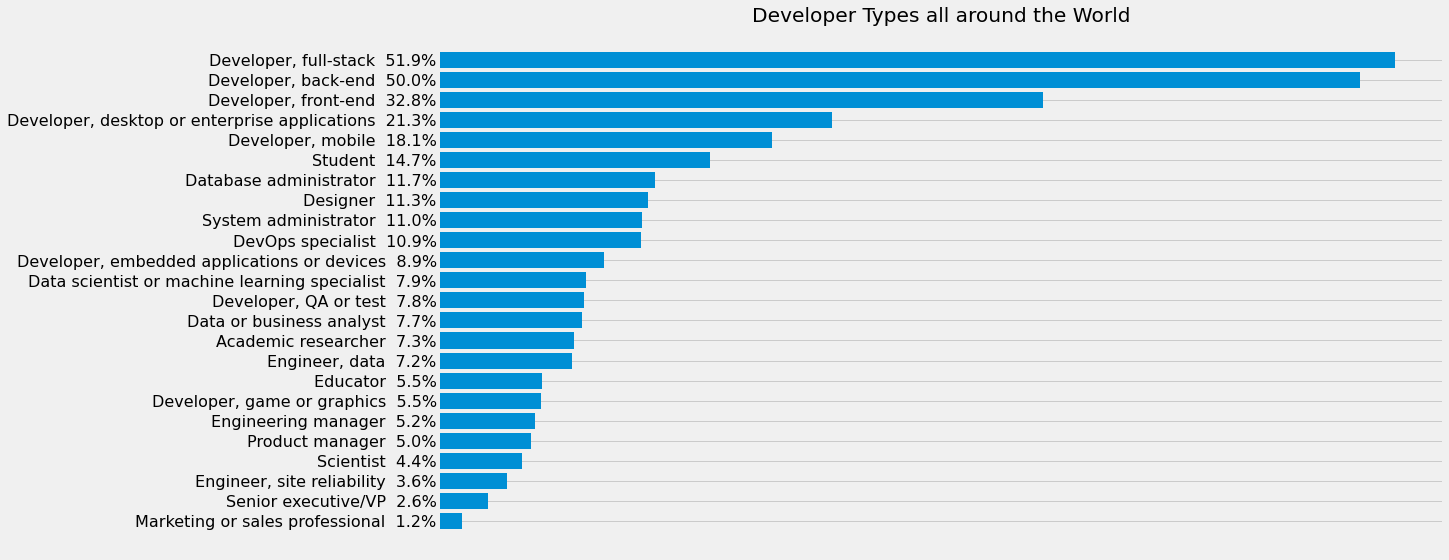

In [111]:
DevType = data["DevType"]    # ვიაძახებ მხოლოდ დეველოპერების პროფესიებს
 
DevType.dropna( inplace=True)   # ვფილტრავ და ვაშორებ ცარიელ ადგილებს

DevType = DevType.str.split(';')  # ვხლიჩავ გამყოფ ნიშან ;- თან და ვწერ სიებში


list_sorter_counter(DevType)  # ავტომატური სორტირება

Build_Barh_sizes( key_Phrases , Quantity, DevType ,"fivethirtyeight", False , (16,9), "Developer Types all around the World") # ვაგებთ გრაფიკს


                                                                    OpenSourcer

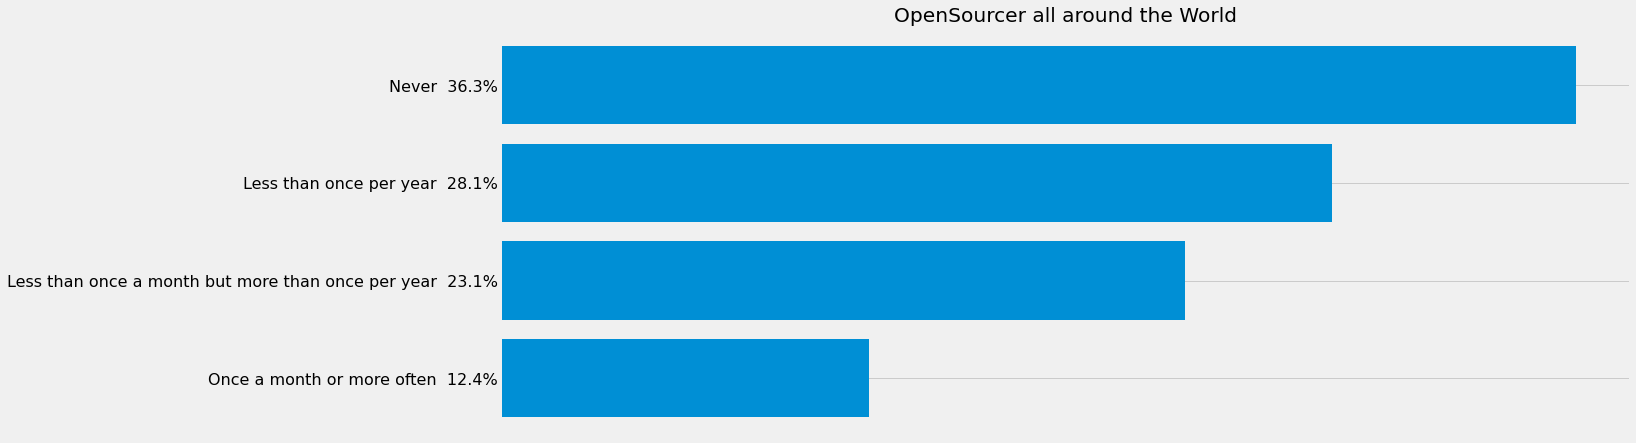

In [89]:
OpenSourcer = data["OpenSourcer"]  # ვიხებთ მხოლოდ OpenSourcer-ის ინფოს

counted = Counter(OpenSourcer)  # ვითვლით OpenSourcer-ების პასუხებს

Counted_sorted = sort_dict_by_value(counted, False)  # ვალაგებთ ზრდის-კლების მიხედვით OpenSourcer-ის პასუხებს

key_Phrases=[]  # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]     # ვქმნით რაოდენოის შესანახ ლისთს

for i in Counted_sorted:   #ვანაწილებთ ლისთებში
    key_Phrases.append(i)  # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(counted[i])  # ვანაწილებთ რაოდენოის შესანახ ლისთში



Build_Barh_sizes( key_Phrases , Quantity, OpenSourcer ,"fivethirtyeight", False , (18,7), "OpenSourcer all around the World")   # ვაგებთ გრაფიკს


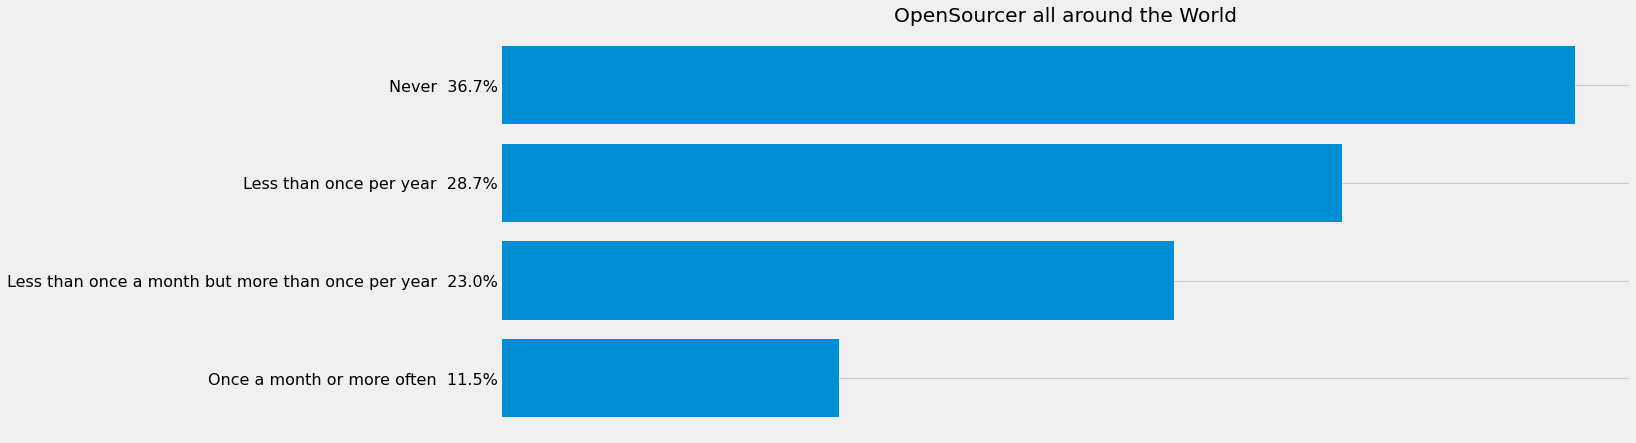

In [90]:
OpenSourcer_USA = data["OpenSourcer"]

OpenSourcer_USA.dropna(inplace = True)

OpenSourcer = data[(OpenSourcer_USA!= "NaN") & (data["Country"] == "United States")]  


New_Opensourcer = OpenSourcer["OpenSourcer"]

counted = Counter(New_Opensourcer)  

Counted_sorted = sort_dict_by_value(counted, False)

key_Phrases=[]  # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]     # ვქმნით რაოდენოის შესანახ ლისთს

for i in Counted_sorted:   #ვანაწილებთ ლისთებში
    key_Phrases.append(i)  # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(counted[i])  # ვანაწილებთ რაოდენოის შესანახ ლისთში



Build_Barh_sizes( key_Phrases , Quantity, New_Opensourcer ,"fivethirtyeight", False , (18,7), "OpenSourcer all around the World")   # ვაგებთ გრაფიკს


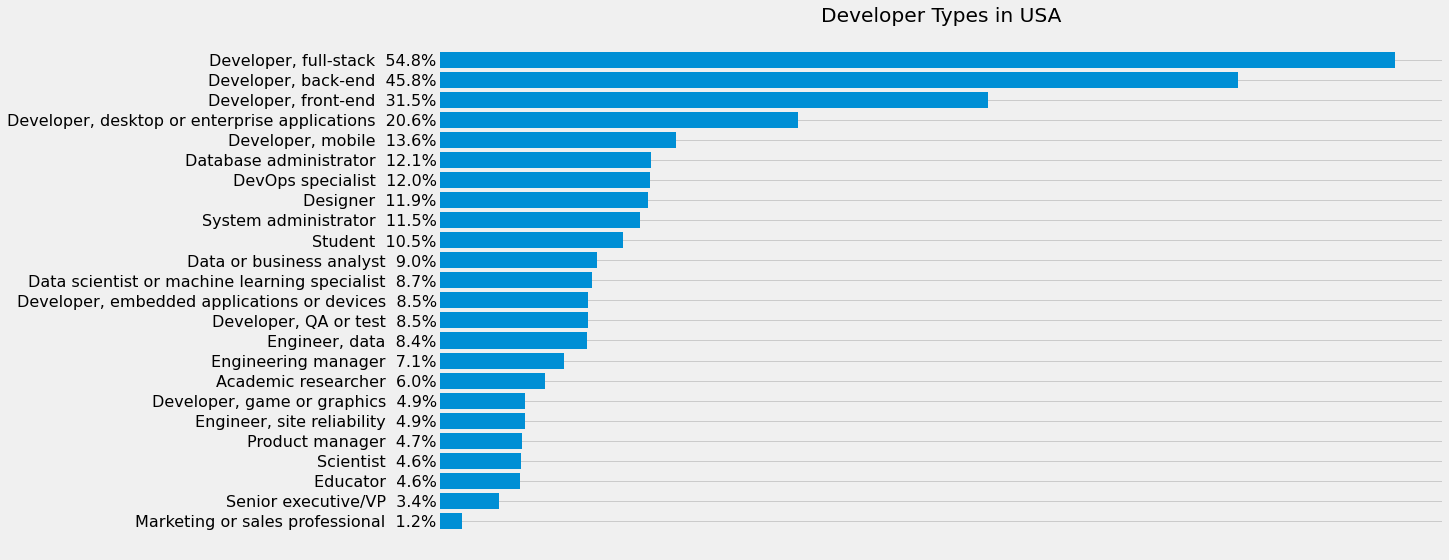

In [91]:
DevType_Filtered = data["DevType"]    # ვიაძახებ მხოლოდ დეველოპერების პროფესიებს
 
DevType_Filtered.dropna( inplace=True)  # ვფილტრავ და ვაშორებ ცარიელ ადგილებს

DevType =data[(DevType_Filtered != "NaN") & (data["Country"] == "United States")]  # ვიღებთ მხოლოდ იმ მონაცემებს რომელიც თანხვედრაში მოდის USA-სთან



New_DevType = DevType["DevType"]  # ვინაცავთ ახალ ცვლადში

New_DevType = New_DevType.str.split(';')  # ვხლიჩავ გამყოფ ნიშან ;- თან და ვწერ სიებში



list_sorter_counter(New_DevType)   # ავტომატური სორტირება

Build_Barh_sizes( key_Phrases , Quantity, New_DevType ,"fivethirtyeight", False , (16,9), "Developer Types in USA") # ვაგებთ გრაფიკს

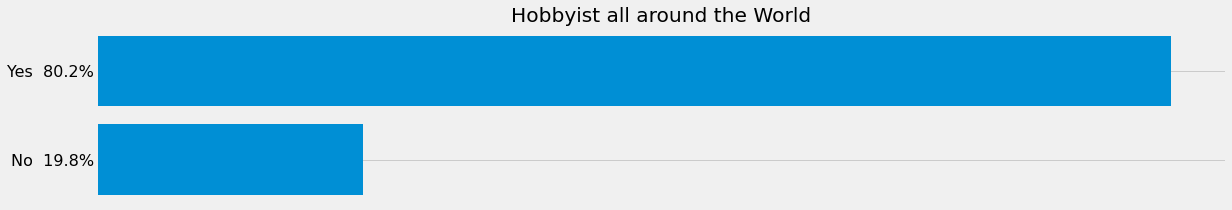

In [92]:
Hobbyist = data["Hobbyist"]

counted = Counter(Hobbyist)  # ვითვლით OpenSourcer-ების პასუხებს

Counted_sorted = sort_dict_by_value(counted, False)  # ვალაგებთ ზრდის-კლების მიხედვით Hobbyist-ის პასუხებს

key_Phrases=[]  # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]     # ვქმნით რაოდენოის შესანახ ლისთს

for i in Counted_sorted:   #ვანაწილებთ ლისთებში
    key_Phrases.append(i)  # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(counted[i])  # ვანაწილებთ რაოდენოის შესანახ ლისთში



Build_Barh_sizes( key_Phrases , Quantity, Hobbyist ,"fivethirtyeight", False , (18,3), "Hobbyist all around the World")   # ვაგებთ გრაფიკს



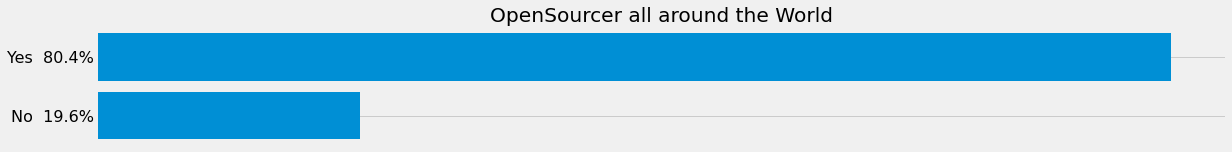

In [93]:
Hobbyist_USA = data["OpenSourcer"]

Hobbyist_USA.dropna(inplace = True)

Hobbyist = data[(Hobbyist_USA != "NaN") & (data["Country"] == "United States")]  


New_Hobbyist= Hobbyist["Hobbyist"]

counted = Counter(New_Hobbyist)  

Counted_sorted = sort_dict_by_value(counted, False)

key_Phrases=[]  # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]     # ვქმნით რაოდენოის შესანახ ლისთს

for i in Counted_sorted:   #ვანაწილებთ ლისთებში
    key_Phrases.append(i)  # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(counted[i])  # ვანაწილებთ რაოდენოის შესანახ ლისთში



Build_Barh_sizes( key_Phrases , Quantity, New_Hobbyist ,"fivethirtyeight", False , (18,2), "OpenSourcer all around the World")   # ვაგებთ გრაფიკს


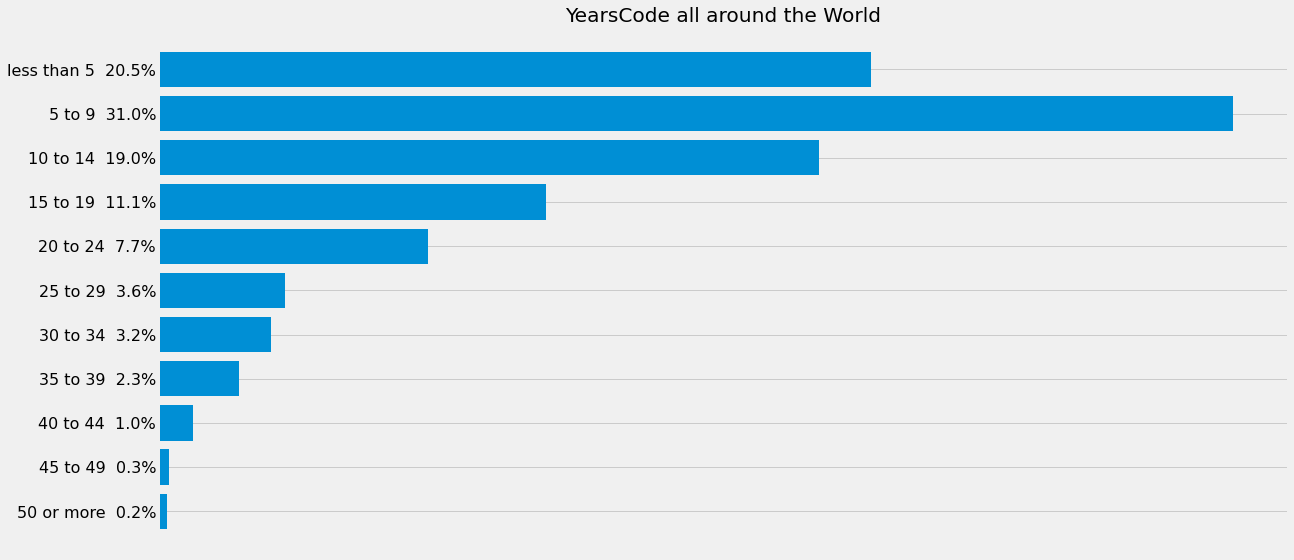

In [159]:
YearsCode = data["YearsCode"]
YearsCode.dropna(inplace = True)


######### ფუნქცია ანაწილებს ადამიანებს სხვადასხვა ასაკობრის ჯგუფში
year_5_to_50(YearsCode)


##### ამით კიდე გრაფიკს ვაგებთაა  ##########
Build_Barh_sizes( Phrases_5_to_50 , quantity_5_to_50, YearsCode, "fivethirtyeight", False , (18,9), "YearsCode all around the World")   # ვაგებთ გრაფიკს

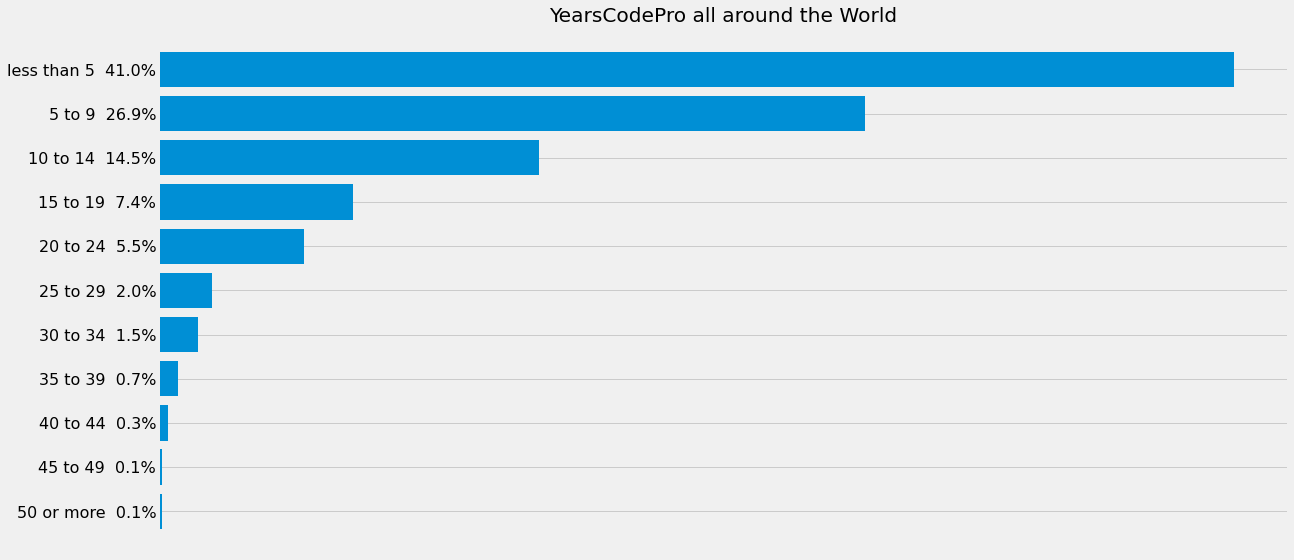

In [155]:
YearsCodePro = data["YearsCodePro"]
YearsCodePro.dropna(inplace=True)


######### ფუნქცია ანაწილებს ადამიანებს სხვადასხვა ასაკობრის ჯგუფში
year_5_to_50(YearsCodePro)


##### ამით კიდე გრაფიკს ვაგებთაა  ##########
Build_Barh_sizes( Phrases_5_to_50 , quantity_5_to_50, YearsCodePro, "fivethirtyeight", False , (18,9), "YearsCodePro all around the World")   # ვაგებთ გრაფიკს


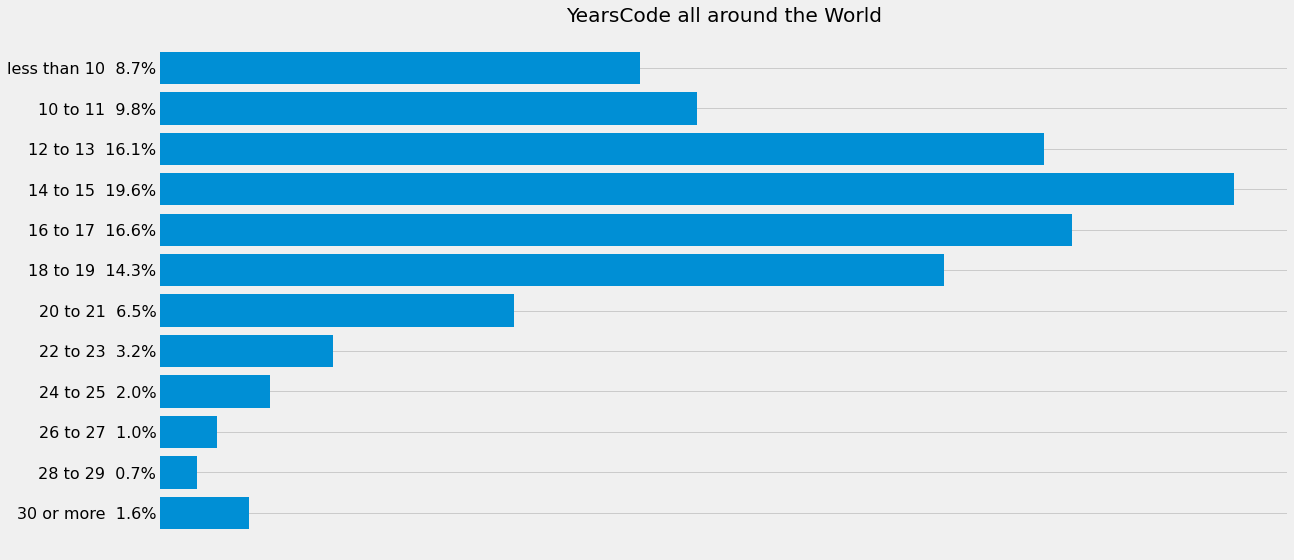

In [162]:
Age1stCode = data["Age1stCode"]
Age1stCode.dropna(inplace = True)


year_10_to_30(Age1stCode)

##### ამით კიდე გრაფიკს ვაგებთაა  ##########
Build_Barh_sizes( Phrases_10_to_30, Quantity_10_to_30, Age1stCode, "fivethirtyeight", False , (18,9), "YearsCode all around the World")   

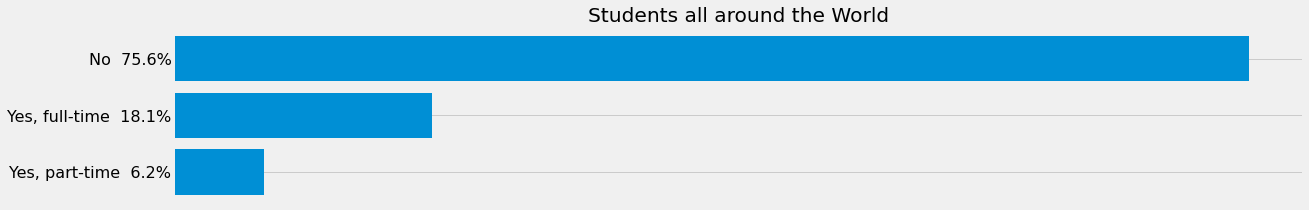

In [97]:
Student = data["Student"]
Student.dropna(inplace = True)
counted = Counter(Student)  # ვითვლით student-ების პასუხებს
Counted_sorted = sort_dict_by_value(counted, False)  # ვალაგებთ ზრდის-კლების მიხედვით Student-ების პასუხებს

key_Phrases=[]  # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]     # ვქმნით რაოდენოის შესანახ ლისთს

for i in Counted_sorted:   #ვანაწილებთ ლისთებში
    key_Phrases.append(i)  # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(counted[i])  # ვანაწილებთ რაოდენოის შესანახ ლისთში



Build_Barh_sizes( key_Phrases , Quantity, Student ,"fivethirtyeight", False , (18,3), "Students all around the World")   # ვაგებთ გრაფიკს






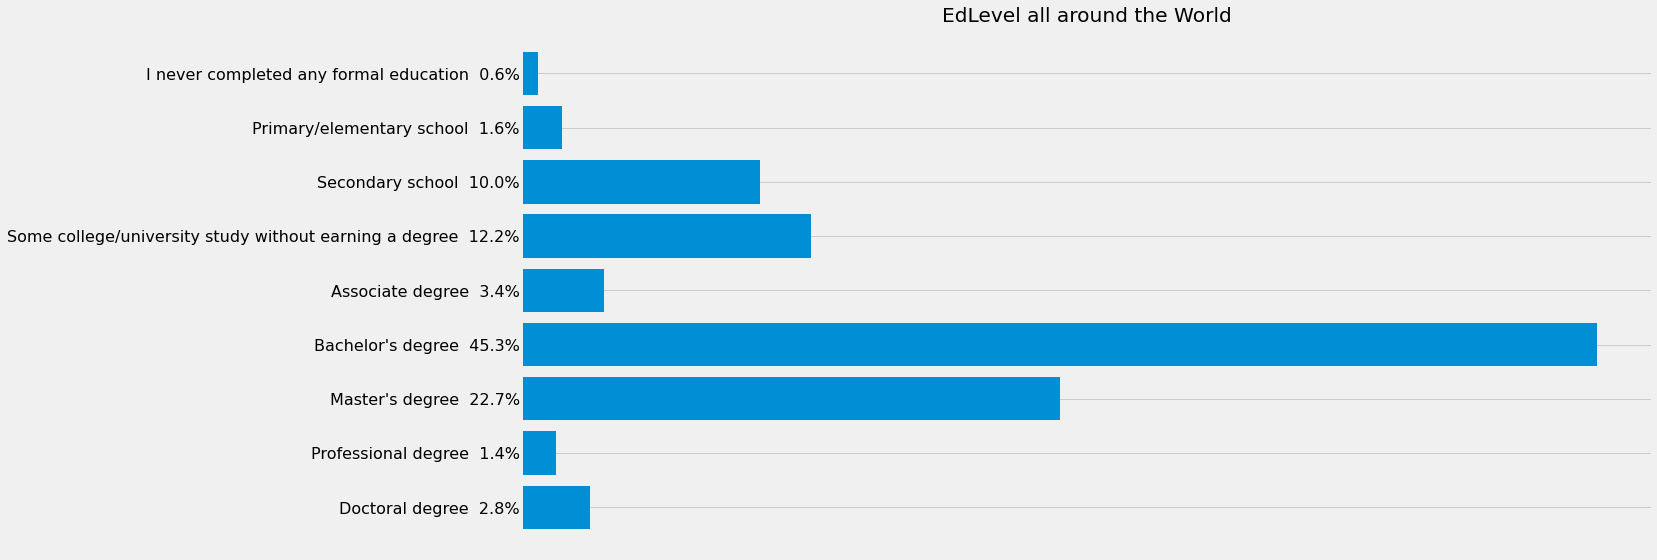

In [98]:

EdLevel = data["EdLevel"]
EdLevel.dropna(inplace = True)


######### ვქმნით ცარიელ სიებს, სადაც უნდა შევინახოთ შესაბამისი მონაცემები #########
no_education = []
primary_school = []
secondary_school = []
collage_degree = []
associate_degree = []
bachelor_degree = []
master_degree = []
professional_degree = []
doctoral_degree = []


########## ვანაწილებთ ფრაზებს შესაბამის სიებში ########
for i in EdLevel:
    if i=="I never completed any formal education":
        no_education.append(i)
    elif i=="Primary/elementary school":
        primary_school.append(i)
    elif i=='Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)':
        secondary_school.append(i)
    elif i=='Some college/university study without earning a degree':
        collage_degree.append(i)
    elif i=='Associate degree':
        associate_degree.append(i)
    elif i=='Bachelor’s degree (BA, BS, B.Eng., etc.)':
        bachelor_degree.append(i)
    elif i=='Master’s degree (MA, MS, M.Eng., MBA, etc.)':
        master_degree.append(i)
    elif i ==  'Professional degree (JD, MD, etc.)':
        professional_degree.append(i)
    elif i== 'Other doctoral degree (Ph.D, Ed.D., etc.)':
        doctoral_degree.append(i)





######## ვაკეთებთ ფრაზების და მათი შესაბამისი რაოდენობების შესანახ სიას #####3
key_Phrases=[ "I never completed any formal education", "Primary/elementary school", "Secondary school", "Some college/university study without earning a degree", "Associate degree", "Bachelor's degree", "Master's degree", "Professional degree", "Doctoral degree"]  # ვქმნით ფრაზების შესანახ ლისთს


#### აქ პირდაპირ დავწერე თითოეული სიის სიგრძე ცალკე რო აღარ მეწერა #########
Quantity = [len(no_education), len( primary_school), len(secondary_school), len(collage_degree), len(associate_degree), len(bachelor_degree), len(master_degree), len( professional_degree), len(doctoral_degree)]

########## ამის საშუალებით ვაბრუნებთ გრაფიკზე დატანილ მონაცემებს #########
key_Phrases.reverse()
Quantity.reverse()

#### ამით ვაგებთ გრაფიკსა ##########
Build_Barh_sizes( key_Phrases , Quantity, EdLevel ,"fivethirtyeight", False , (18,9), "EdLevel all around the World")   


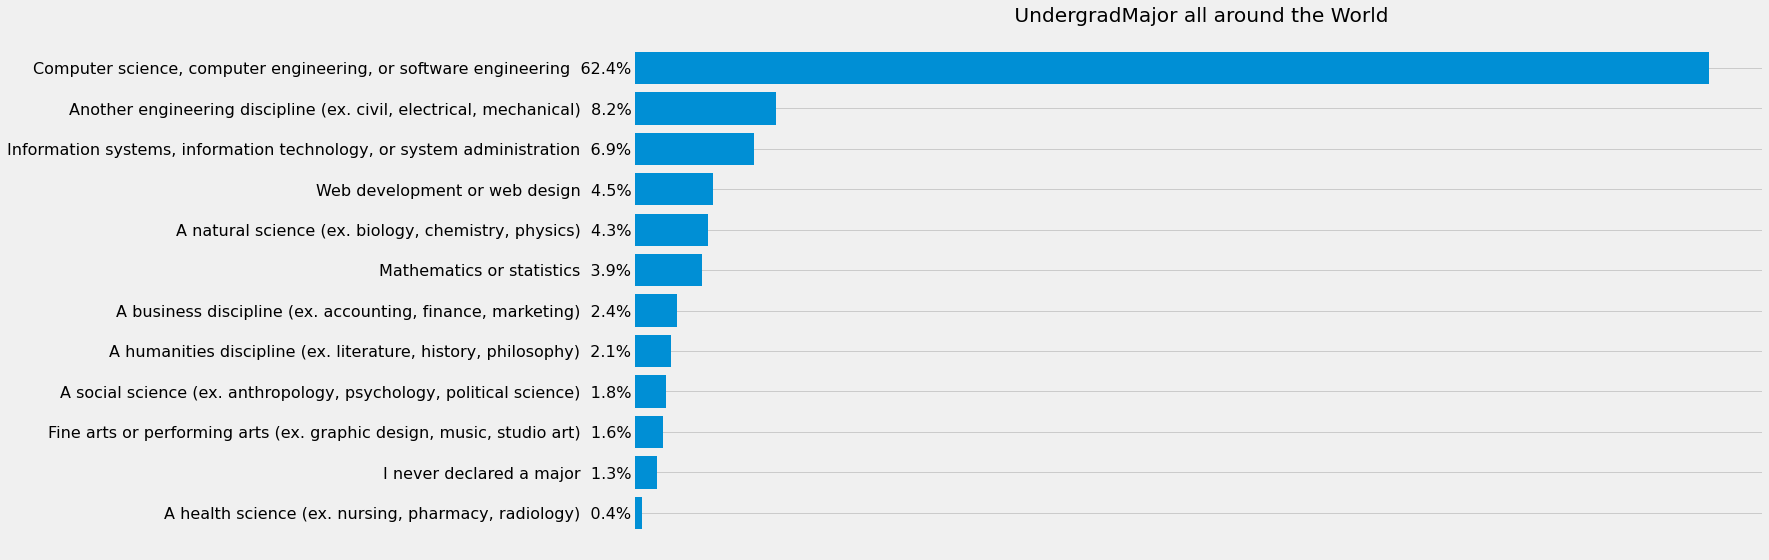

In [99]:
UndergradMajor = data["UndergradMajor"]
UndergradMajor.dropna(inplace = True)


counted = Counter(UndergradMajor)  # ვითვლით UndergradMajor-ების პასუხებს
Counted_sorted = sort_dict_by_value(counted, False)  # ვალაგებთ ზრდის-კლების მიხედვით UndergradMajor-ების პასუხებს

key_Phrases=[]  # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]     # ვქმნით რაოდენოის შესანახ ლისთს

for i in Counted_sorted:   #ვანაწილებთ ლისთებში
    key_Phrases.append(i)  # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(counted[i])  # ვანაწილებთ რაოდენოის შესანახ ლისთში



Build_Barh_sizes( key_Phrases , Quantity, UndergradMajor ,"fivethirtyeight", False , (18,9), " UndergradMajor all around the World")   # ვაგებთ გრაფიკს




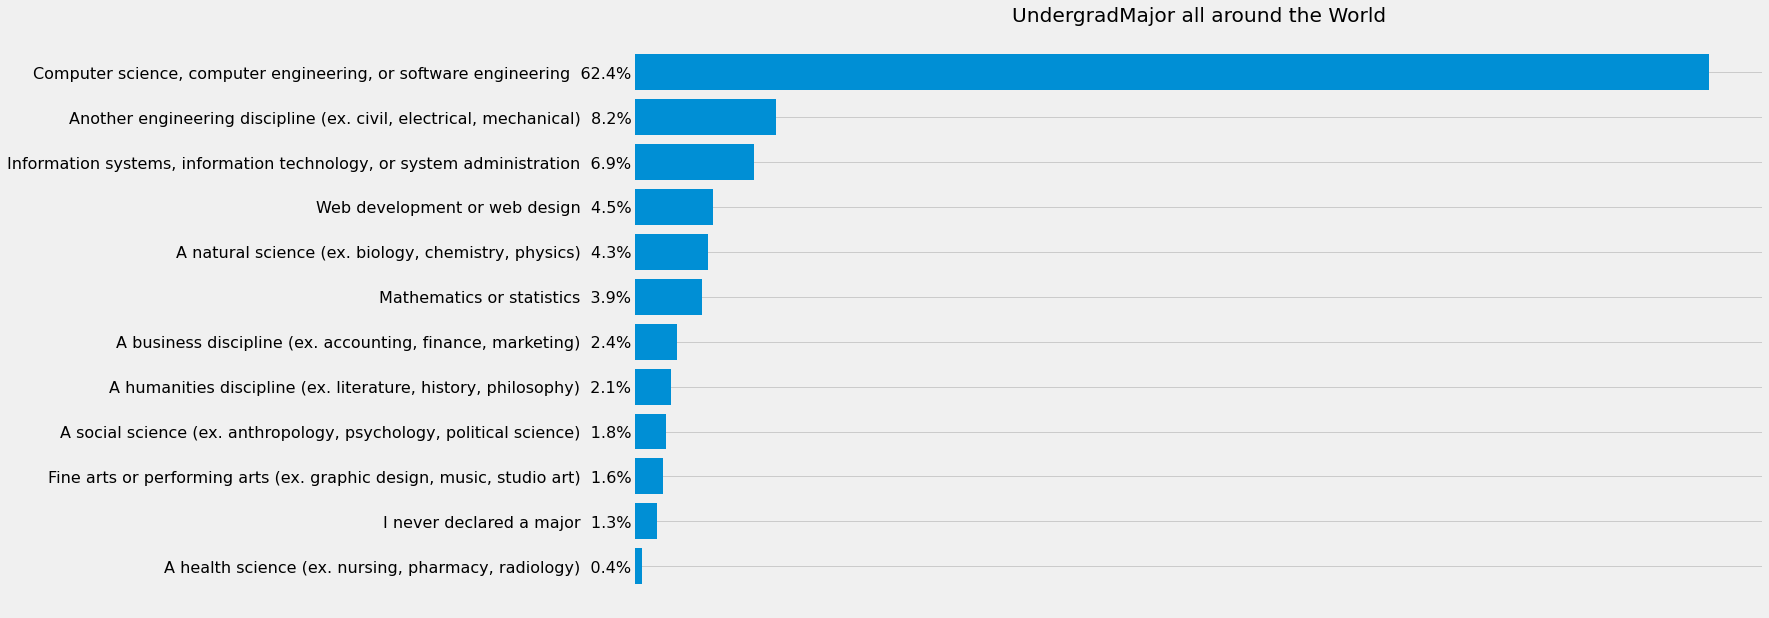

In [100]:
UndergradMajor = data ["UndergradMajor"]
UndergradMajor.dropna(inplace = True)

counted = Counter(UndergradMajor)  # ვითვლით UndergradMajor-ების პასუხებს
Counted_sorted = sort_dict_by_value(counted, False)  # ვალაგებთ ზრდის-კლების მიხედვით UndergradMajor-ების პასუხებს

key_Phrases=[]  # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]     # ვქმნით რაოდენოის შესანახ ლისთს

for i in Counted_sorted:   #ვანაწილებთ ლისთებში
    key_Phrases.append(i)  # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(counted[i])  # ვანაწილებთ რაოდენოის შესანახ ლისთში



Build_Barh_sizes( key_Phrases , Quantity, UndergradMajor ,"fivethirtyeight", False , (18,10), "UndergradMajor all around the World")   # ვაგებთ გრაფიკს





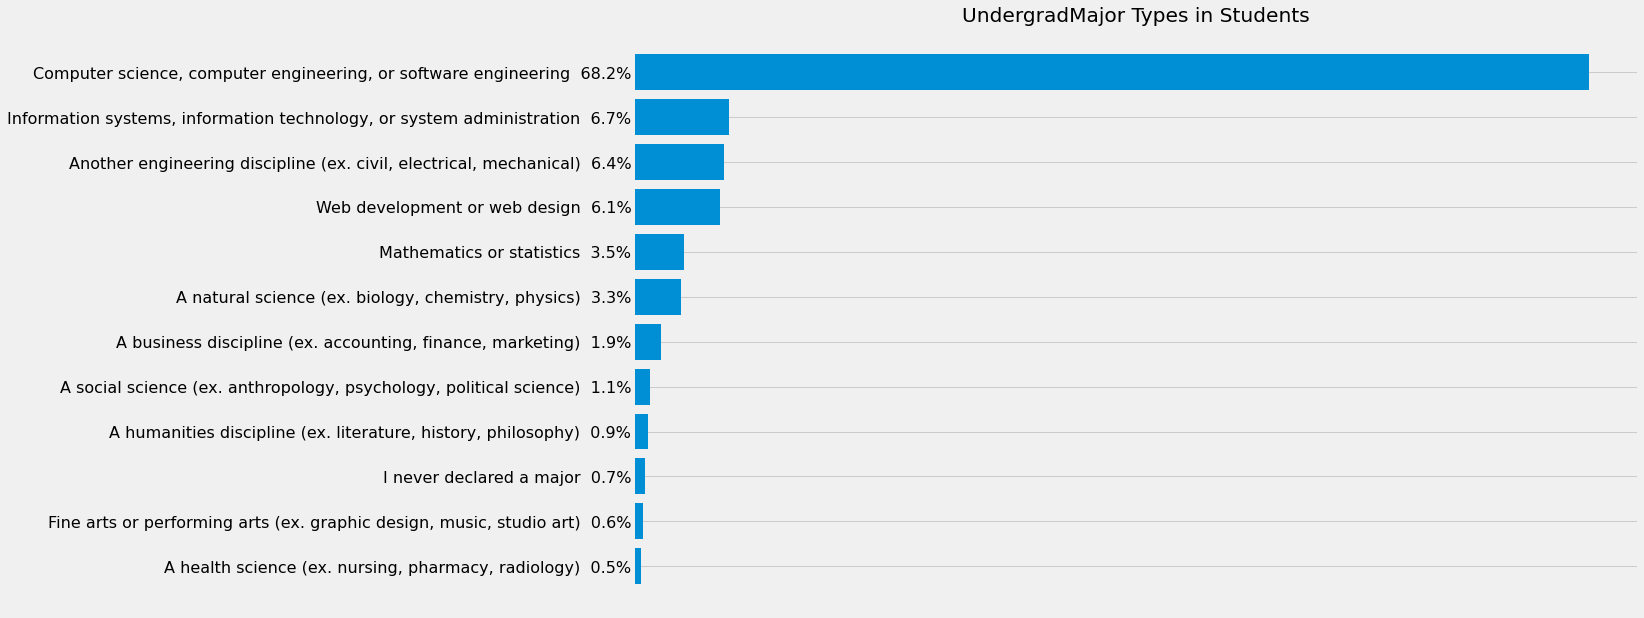

In [101]:
UndergradMajor_Filtered = data["UndergradMajor"]    ######## ვიძახებთ Ethnicity-ის
 
UndergradMajor_Filtered.dropna( inplace=True)  # ვფილტრავ და ვაშორებ ცარიელ ადგილებს

UndergradMajor =data[(UndergradMajor_Filtered!= "NaN") & ((data["Student"] == "Yes, full-time") | (data["Student"] == "Yes, part-time"))]  # ვიღებთ მხოლოდ იმ მონაცემებს რომელიც თანხვედრაში მოდის სტუდენტებთან


New_UndergradMajor= UndergradMajor["UndergradMajor"]  # მიღებულ მონაცემებს ვინახავთ ახალ ცვლადში

New_UndergradMajor = New_UndergradMajor.str.split(';')  # ვხლიჩავ გამყოფ ნიშან ;- თან და ვწერ სიებში



list_sorter_counter(New_UndergradMajor)   # ავტომატური სორტირება

Build_Barh_sizes( key_Phrases , Quantity, New_UndergradMajor ,"fivethirtyeight", False , (16,10), "UndergradMajor Types in Students") # ვაგებთ გრაფიკს

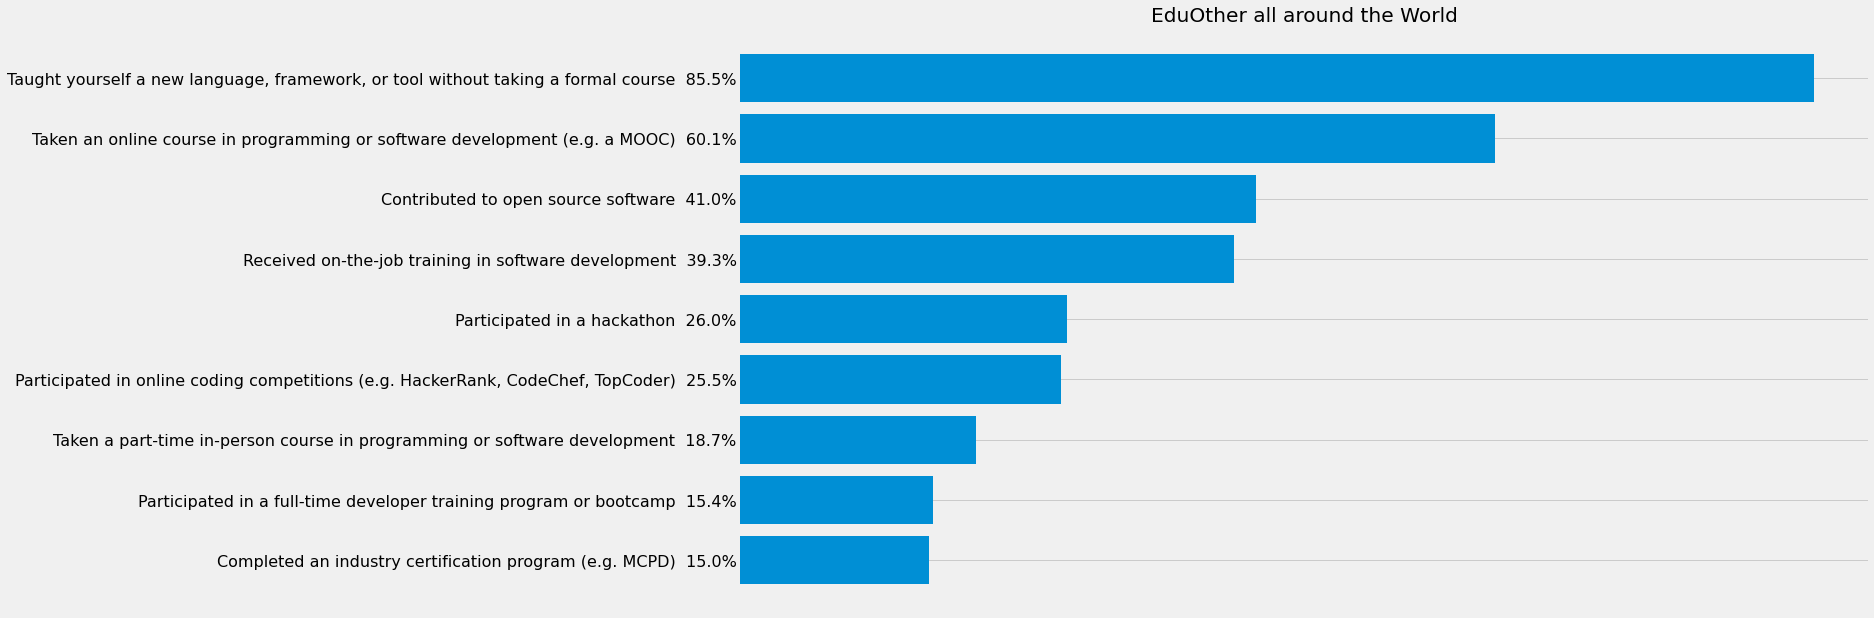

In [102]:
EduOther = data["EduOther"]
EduOther.dropna(inplace = True)
EduOther = EduOther.str.split(';')  # ვხლიჩავ გამყოფ ნიშან ;- თან და ვწერ სიებში

list_sorter_counter(EduOther)   ### ვქმნით ერთ დიდ სიას და ვითლით ლისტის ფრაზების შესაბამის რაოდენობებს


Build_Barh_sizes( key_Phrases , Quantity, EduOther ,"fivethirtyeight", False , (18,10), "EduOther all around the World")   # ვაგებთ გრაფიკს




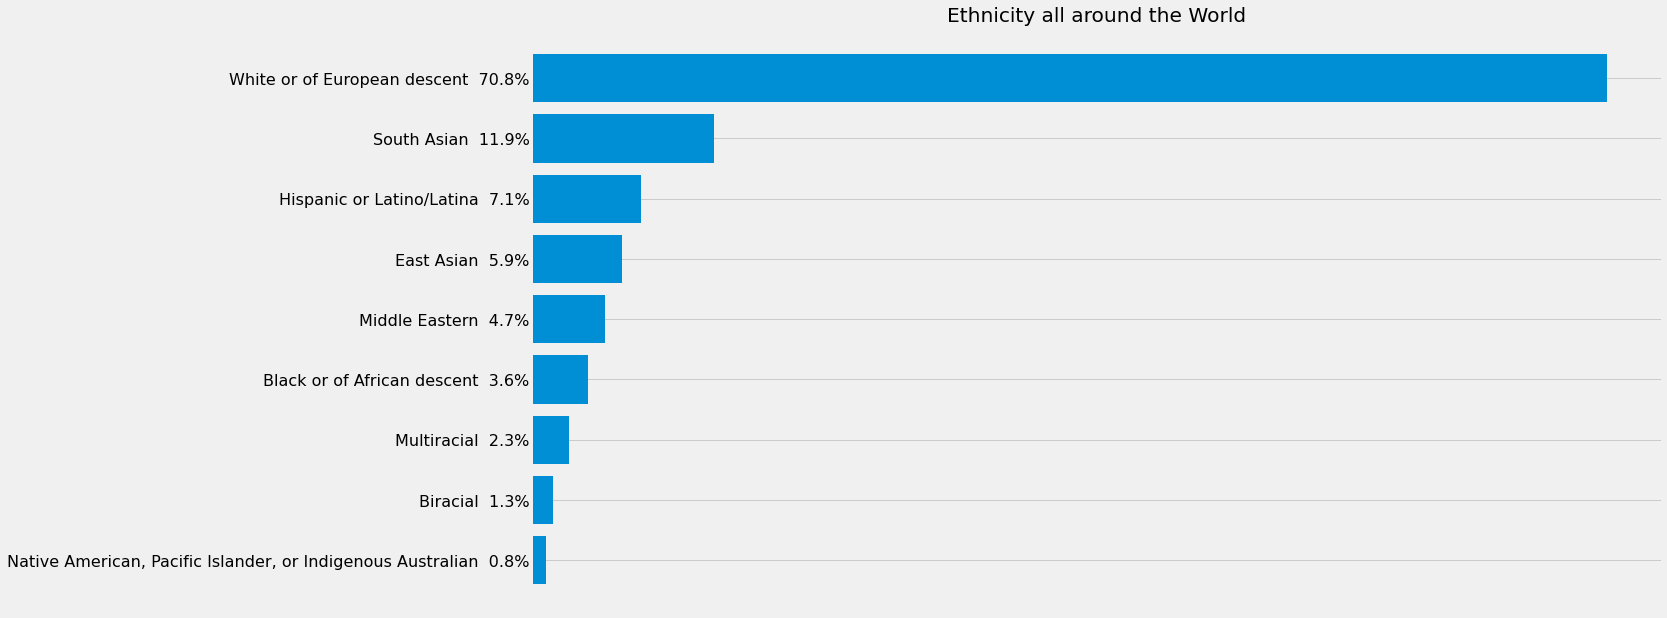

In [103]:
Ethnicity = data ["Ethnicity"]
Ethnicity.dropna(inplace = True)


Ethnicity = Ethnicity.str.split(';')  # ვხლიჩავ გამყოფ ნიშან ;- თან და ვწერ სიებში

list_sorter_counter(Ethnicity)  ### ვქმნით ერთ დიდ სიას და ვითლით ლისტის ფრაზების შესაბამის რაოდენობებს

Build_Barh_sizes( key_Phrases , Quantity, Ethnicity ,"fivethirtyeight", False , (18,10), "Ethnicity all around the World")   # ვაგებთ გრაფიკს


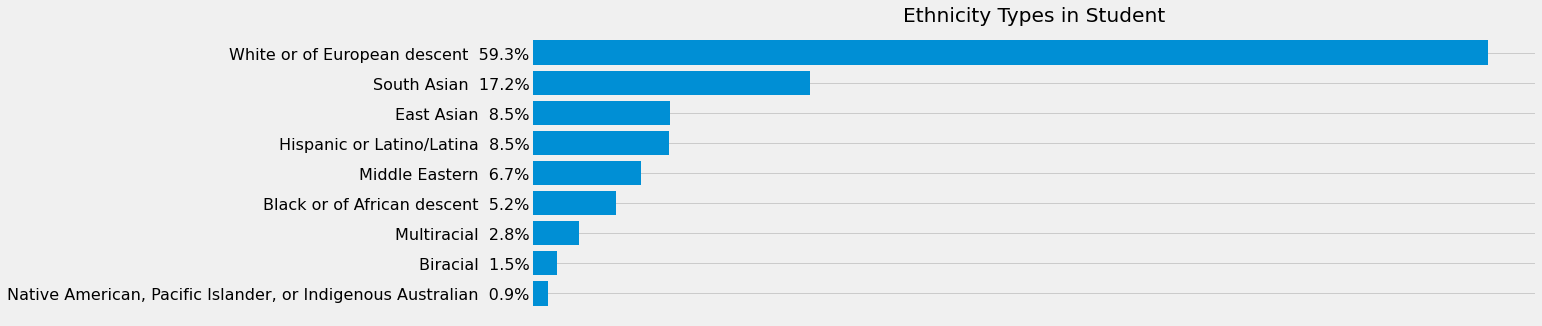

In [104]:
Ethnicity_Filtered = data["Ethnicity"]    ######## ვიძახებთ Ethnicity-ის
 
Ethnicity_Filtered.dropna( inplace=True)  # ვფილტრავ და ვაშორებ ცარიელ ადგილებს

Ethnicity =data[(Ethnicity_Filtered!= "NaN") & ((data["Student"] == "Yes, full-time") | (data["Student"] == "Yes, part-time"))]  # ვიღებთ მხოლოდ იმ მონაცემებს რომელიც თანხვედრაში მოდის სტუდენტებთან


New_Ethnicity = Ethnicity["Ethnicity"]  # მიღებულ მონაცემებს ვინახავთ ახალ ცვლადში

New_Ethnicity = New_Ethnicity.str.split(';')  # ვხლიჩავ გამყოფ ნიშან ;- თან და ვწერ სიებში



list_sorter_counter(New_Ethnicity)   # ავტომატური სორტირება

Build_Barh_sizes( key_Phrases , Quantity, New_Ethnicity ,"fivethirtyeight", False , (16,5), "Ethnicity Types in Student") # ვაგებთ გრაფიკს



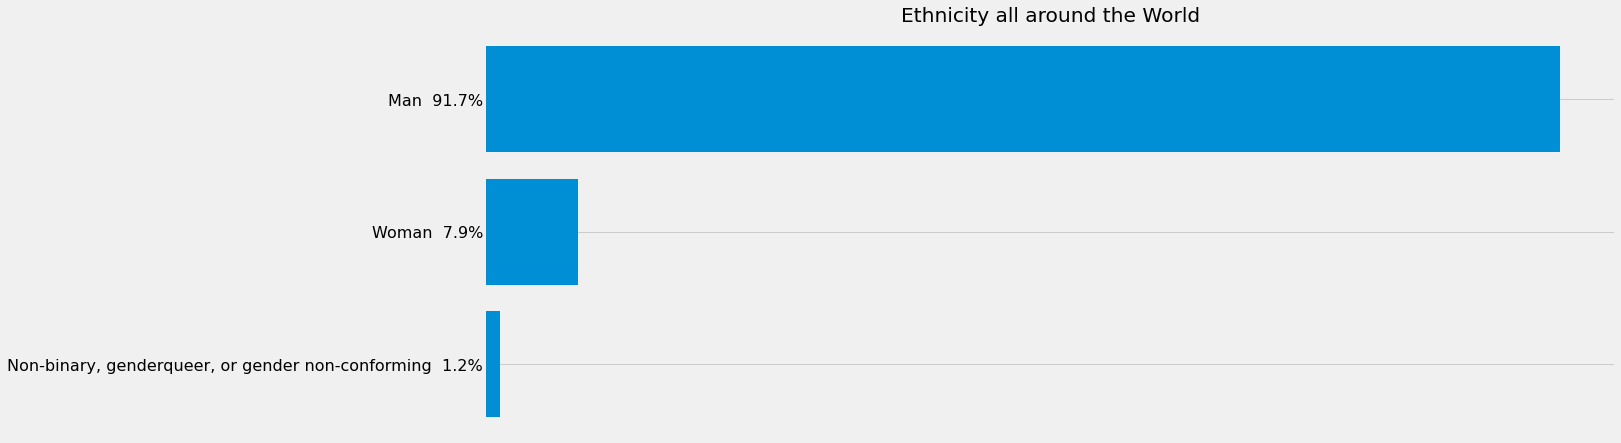

In [105]:
Gender = data["Gender"]
Gender.dropna(inplace=True)


Gender = Gender.str.split(';')  # ვხლიჩავ გამყოფ ნიშან ;- თან და ვწერ სიებში

list_sorter_counter(Gender)  ### ვქმნით ერთ დიდ სიას და ვითლით ლისტის ფრაზების შესაბამის რაოდენობებს

Build_Barh_sizes( key_Phrases , Quantity, Gender ,"fivethirtyeight", False , (18,7), "Ethnicity all around the World")   # ვაგებთ გრაფიკს



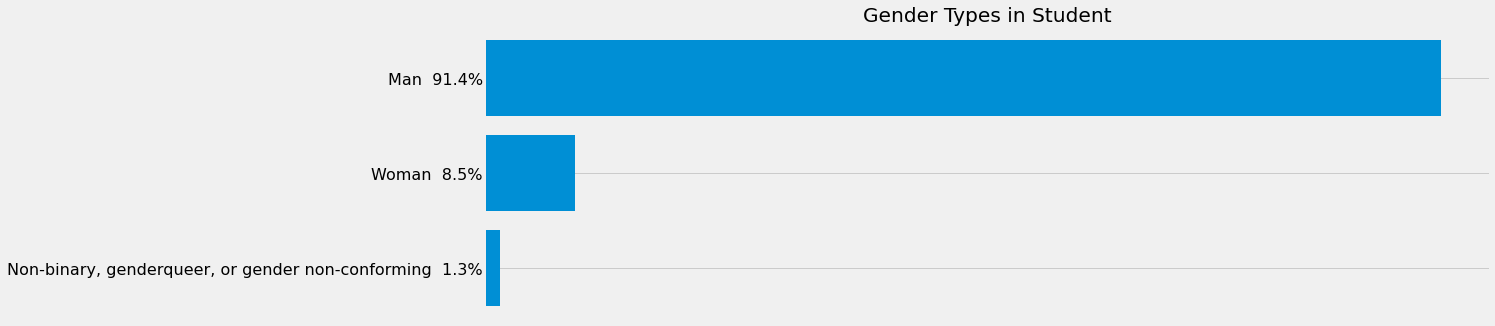

In [106]:
Gender_Filtered = data["Gender"]    # ვიძახებთ Gender-ს
 
Gender_Filtered.dropna( inplace=True)  # ვფილტრავ და ვაშორებ ცარიელ ადგილებს

Gender =data[(Gender_Filtered!= "NaN") & ((data["Student"] == "Yes, full-time") | (data["Student"] == "Yes, part-time"))]  # ვიღებთ მხოლოდ იმ მონაცემებს რომელიც თანხვედრაში მოდის სტუდენტებთან


New_Gender = Gender["Gender"]  # ვინახავთ ახალ ცვლადში

New_Gender = New_Gender.str.split(';')  # ვხლიჩავ გამყოფ ნიშან ;- თან და ვწერ სიებში


list_sorter_counter(New_Gender)   # ავტომატური სორტირება

Build_Barh_sizes( key_Phrases , Quantity, New_Gender ,"fivethirtyeight", False , (16,5), "Gender Types in Student") # ვაგებთ გრაფიკს

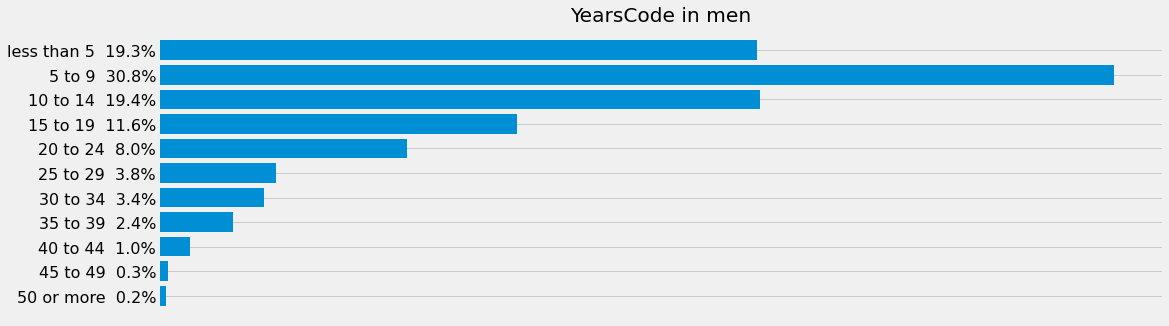

In [156]:
###### es davikidot cotaxans
YearsCode = data["YearsCode"]
YearsCode.dropna(inplace = True)


man  = data[ (YearsCode != "nan") & ((data["Gender"] == "Man") | (data["Gender"] == "Woman;Man")  | (data["Gender"] == "Woman;Man;Non-binary, genderqueer, or gender non-conforming")   | (data["Gender"] == "Man;Non-binary, genderqueer, or gender non-conforming"))] # Data by gender
new_man = man["YearsCode"]

######### ფუნქცია ანაწილებს ადამიანებს სხვადასხვა ასაკობრის ჯგუფში
year_5_to_50(new_man)
        


# ვაგებთ გრაფიკს
Build_Barh_sizes( Phrases_5_to_50 , quantity_5_to_50, new_man ,"fivethirtyeight", False , (16,5), "YearsCode in men") 

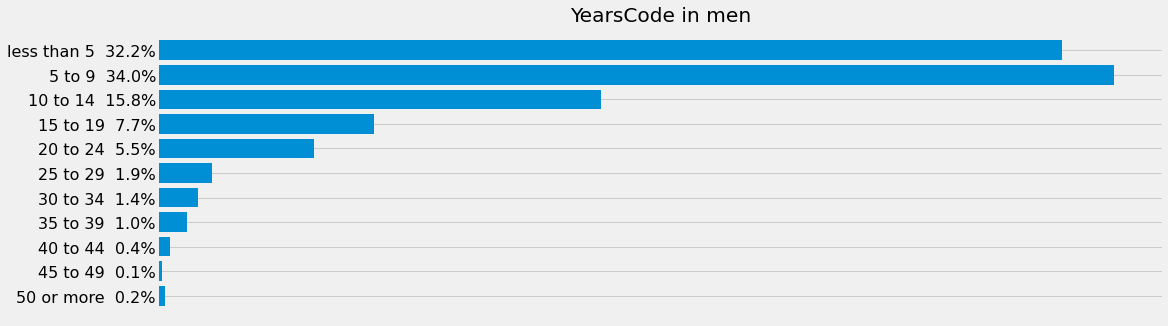

In [169]:
###### es davikidot cotaxans
YearsCode = data["YearsCode"]
YearsCode.dropna(inplace = True)


woman  = data[ (YearsCode != "nan") & ((data["Gender"] == "Woman") | (data["Gender"] == "Woman;Man")  | (data["Gender"] == "Woman;Non-binary, genderqueer, or gender non-conforming")   | (data["Gender"] == "Woman;Man;Non-binary, genderqueer, or gender non-conforming"))] # Data by gender
new_woman = woman["YearsCode"]

######### ფუნქცია ანაწილებს ადამიანებს სხვადასხვა ასაკობრის ჯგუფში
year_5_to_50(new_woman)
        


# ვაგებთ გრაფიკს
Build_Barh_sizes( Phrases_5_to_50 , quantity_5_to_50, new_woman ,"fivethirtyeight", False , (16,5), "YearsCode in men") 

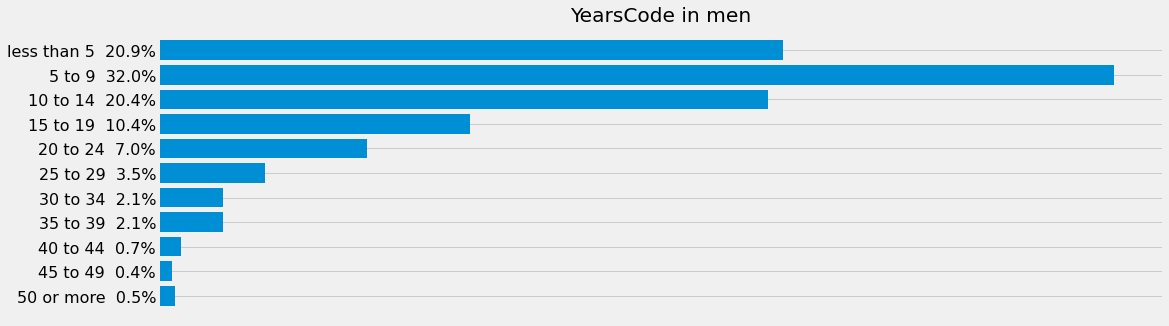

In [170]:
###### es davikidot cotaxans
YearsCode = data["YearsCode"]
YearsCode.dropna(inplace = True)


LGBTQ  = data[ (YearsCode != "nan") & ((data["Gender"] == "Non-binary, genderqueer, or gender non-conforming") | (data["Gender"] == "Woman;Non-binary, genderqueer, or gender non-conforming")  | (data["Gender"] == "Woman;Non-binary, genderqueer, or gender non-conforming")   | (data["Gender"] == "Woman;Man;Non-binary, genderqueer, or gender non-conforming") | (data["Gender"] == "Man;Non-binary, genderqueer, or gender non-conforming"))] # Data by gender
new_LGBTQ = LGBTQ["YearsCode"]

######### ფუნქცია ანაწილებს ადამიანებს სხვადასხვა ასაკობრის ჯგუფში
year_5_to_50(new_LGBTQ)
        


# ვაგებთ გრაფიკს
Build_Barh_sizes( Phrases_5_to_50 , quantity_5_to_50, new_LGBTQ ,"fivethirtyeight", False , (16,5), "YearsCode in men") 

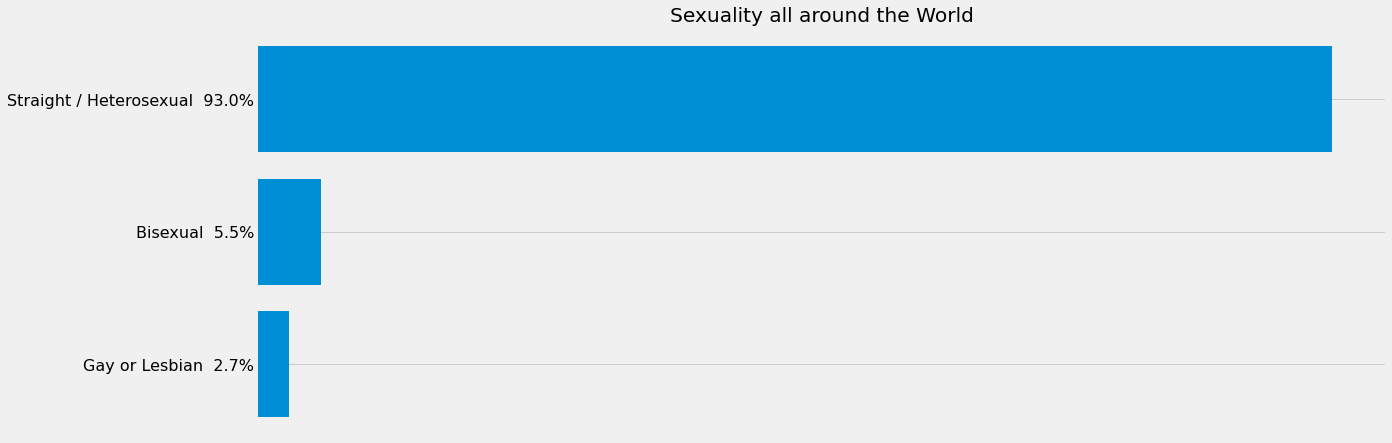

In [108]:
Sexuality = data["Sexuality"]
Sexuality.dropna(inplace = True)

Sexuality = Sexuality.str.split(';')  # ვხლიჩავ გამყოფ ნიშან ;- თან და ვწერ სიებში
list_sorter_counter(Sexuality)  ### ვქმნით ერთ დიდ სიას და ვითლით ლისტის ფრაზების შესაბამის რაოდენობებს


Build_Barh_sizes( key_Phrases , Quantity, Sexuality ,"fivethirtyeight", False , (18,7), "Sexuality all around the World")   # ვაგებთ გრაფიკს




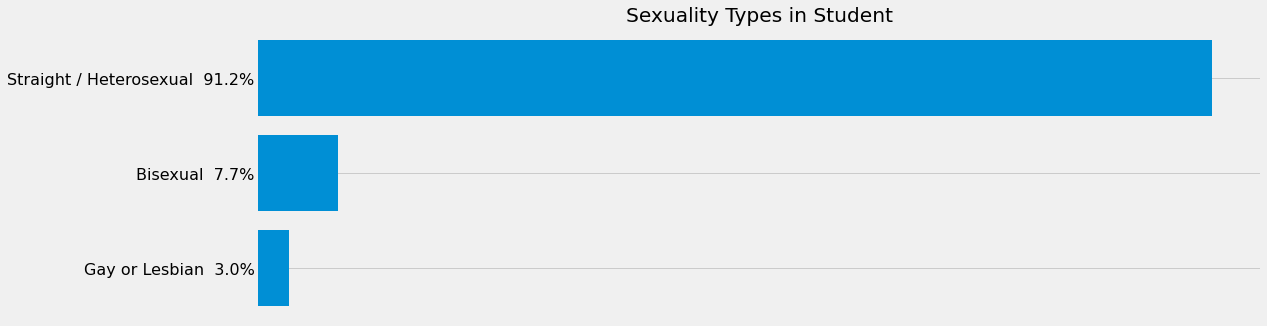

In [109]:
Sexuality_Filtered = data["Sexuality"]    # ვიძახებთ Gender-ს
 
Sexuality_Filtered.dropna( inplace=True)  # ვფილტრავ და ვაშორებ ცარიელ ადგილებს

Sexuality =data[(Sexuality_Filtered!= "NaN") & ((data["Student"] == "Yes, full-time") | (data["Student"] == "Yes, part-time"))]  # ვიღებთ მხოლოდ იმ მონაცემებს რომელიც თანხვედრაში მოდის სტუდენტებთან


New_Sexuality = Sexuality["Sexuality"]  # ვინახავთ ახალ ცვლადში

New_Sexuality = New_Sexuality.str.split(';')  # ვხლიჩავ გამყოფ ნიშან ;- თან და ვწერ სიებში


list_sorter_counter(New_Sexuality)   # ავტომატური სორტირება

Build_Barh_sizes( key_Phrases , Quantity, New_Sexuality ,"fivethirtyeight", False , (16,5), "Sexuality Types in Student") # ვაგებთ გრაფიკს